In [1]:
import sys
import os
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

if 'google.colab' in sys.modules:
  %pip install -q dtreeviz


In [2]:
!wget "https://drive.google.com/uc?export=download&id=1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ" -O "diabetes.csv"


--2023-10-04 17:48:30--  https://drive.google.com/uc?export=download&id=1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdrn7pj2jvmf3mo5utrgl05hu2m63jih/1696441650000/14399582566128250596/*/1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ?e=download&uuid=9d032960-e8d3-41d0-a1f1-d48b94140fcb [following]
--2023-10-04 17:48:31--  https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdrn7pj2jvmf3mo5utrgl05hu2m63jih/1696441650000/14399582566128250596/*/1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ?e=download&uuid=9d032960-e8d3-41d0-a1f1-d48b94140fcb
Resolving doc-0o-c4-docs.googleusercontent.com (doc-0o-c4-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:

In [4]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
X = pima[feature_cols] # Features
y = pima.label # Target variable
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1) # 70% training and 30% test


In [6]:
import sklearn
from sklearn.tree import *

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


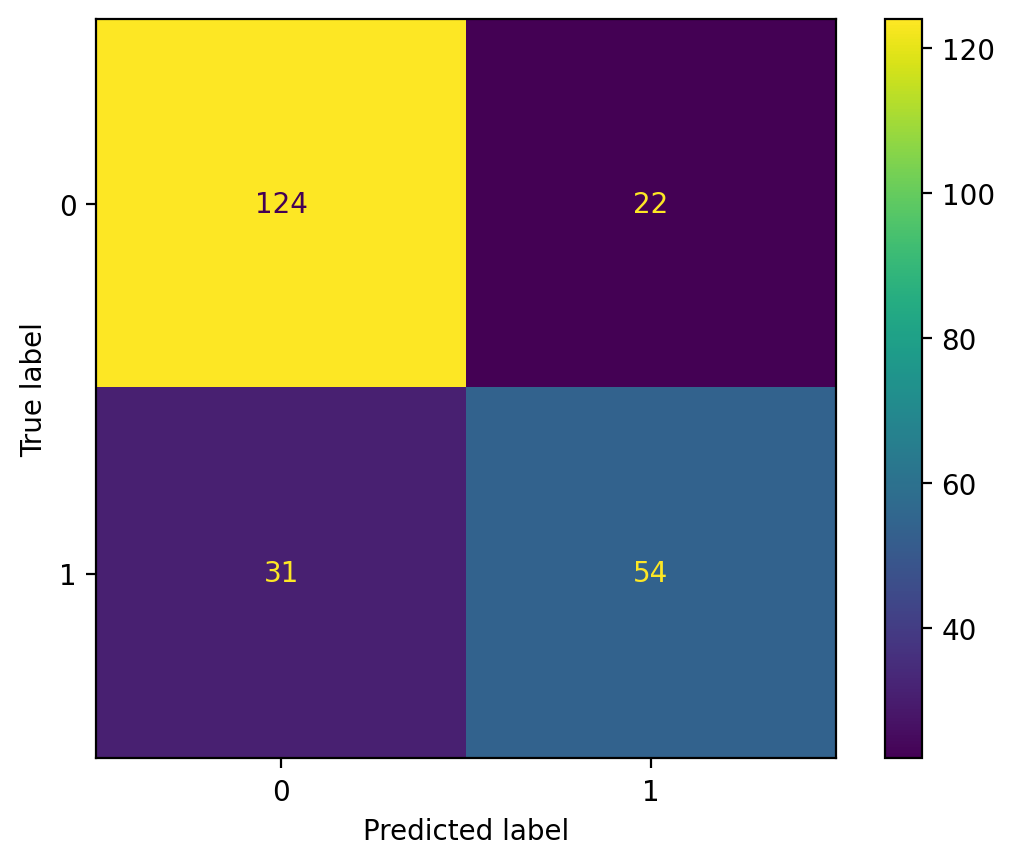

In [7]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=clf.classes_
)
disp.plot()


Text(0.5, 1.0, 'Normalized over all samples')

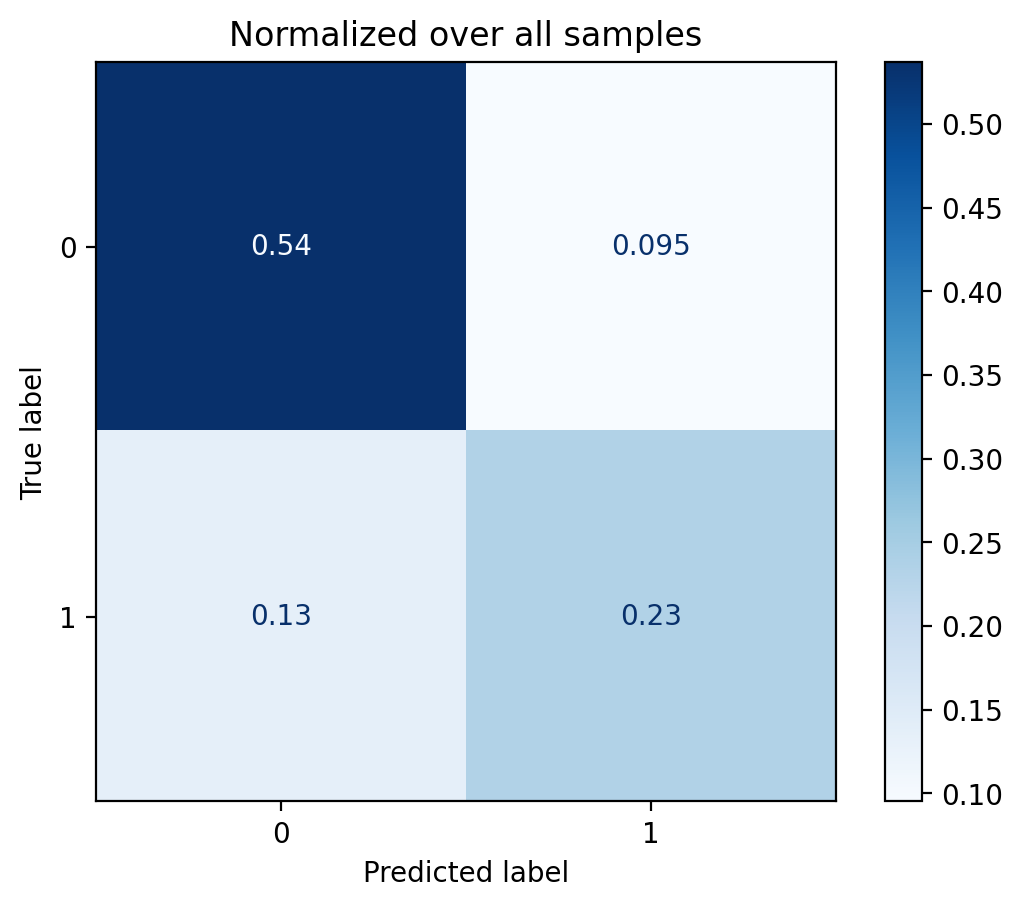

In [9]:
import matplotlib as plt
fig = sklearn.metrics.ConfusionMatrixDisplay.from_estimator(
       clf,
       X_test,
       y_test,
       display_labels=clf.classes_,
       cmap=plt.cm.Blues,
       normalize='all')
fig.ax_.set_title('Normalized over all samples')


Text(0.5, 1.0, 'Normalized over true samples')

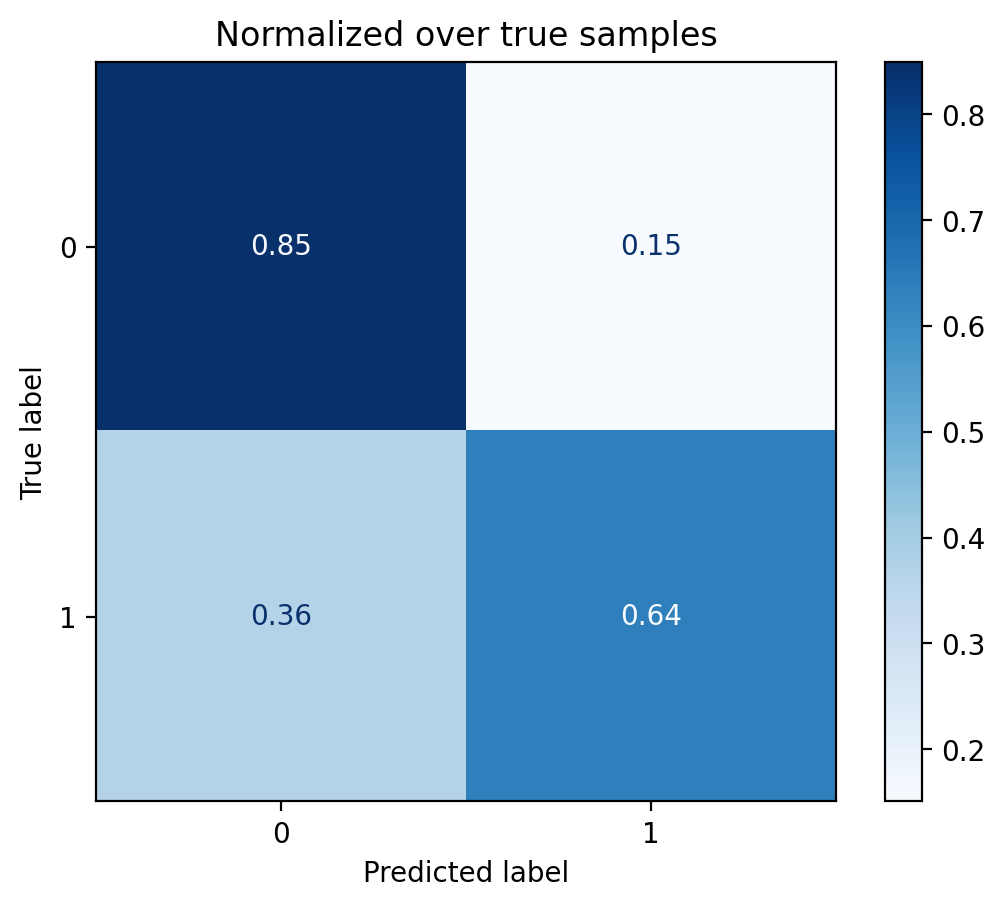

In [10]:
fig = sklearn.metrics.ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=clf.classes_,
        cmap=plt.cm.Blues,
        normalize='true')
fig.ax_.set_title('Normalized over true samples')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


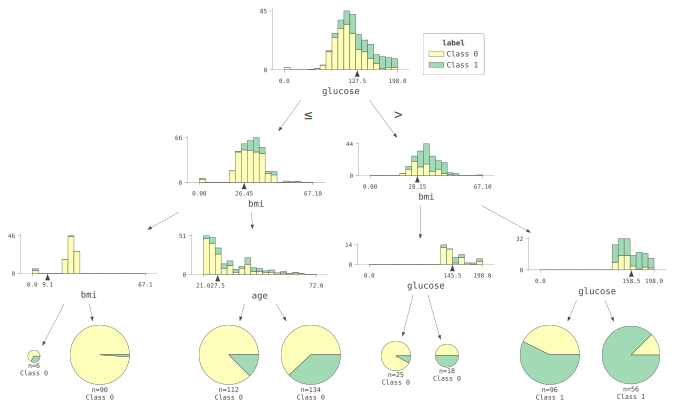

In [12]:
import dtreeviz
viz_model = dtreeviz.model(clf, X_train, y_train,
                            feature_names=feature_cols,
                            target_name='label')
viz_model.view(scale=1.0, fontname="monospace")


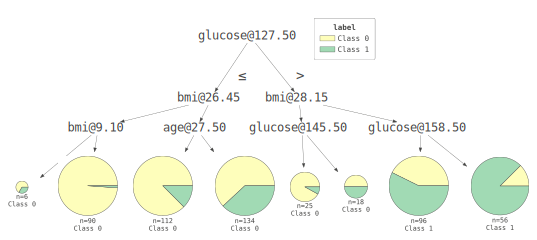

In [13]:
viz_model.view(fancy=False, scale=1.0, fontname="monospace")


In [14]:
x = pima.iloc[10][feature_cols] # Features
x


pregnant      4.000
insulin       0.000
bmi          37.600
age          30.000
glucose     110.000
bp           92.000
pedigree      0.191
Name: 10, dtype: float64

In [15]:
y = pima.label.iloc[10]  # Target variable
y


0

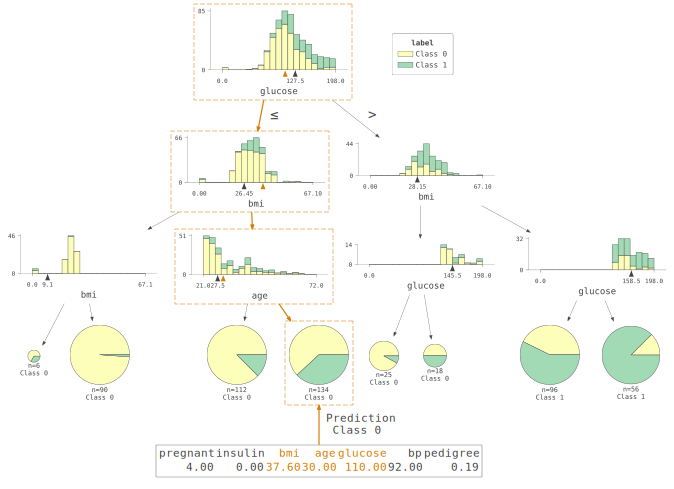

In [16]:
viz_model.view(x=x, fontname="monospace")


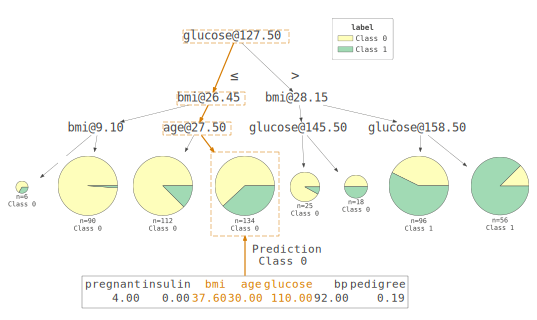

In [17]:
viz_model.view(x=x, fancy=False, fontname="monospace")


In [18]:
print(viz_model.explain_prediction_path(x))


26.45 <= bmi 
27.5 <= age 
glucose < 127.5



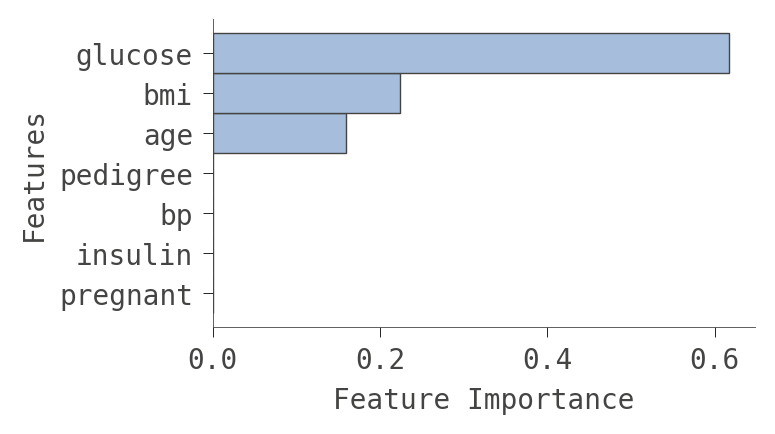

In [19]:
viz_model.instance_feature_importance(x, fontname="monospace", figsize=(3.5, 2))


In [20]:
viz_model.node_stats(node_id=0)


,pregnant,insulin,bmi,age,glucose,bp,pedigree
count,537.0,537.0,537.0,537.0,537.0,537.0,537.0
mean,3.757914,77.500931,31.83892,33.312849,121.001862,68.951583,0.468156
std,3.355361,112.715401,7.675022,11.967574,31.244492,20.115002,0.333139
min,0.0,0.0,0.0,21.0,0.0,0.0,0.085
25%,1.0,0.0,27.0,24.0,100.0,62.0,0.24
50%,3.0,0.0,32.0,29.0,117.0,72.0,0.355
75%,6.0,126.0,36.4,41.0,140.0,80.0,0.613
max,15.0,744.0,67.1,72.0,198.0,122.0,2.329


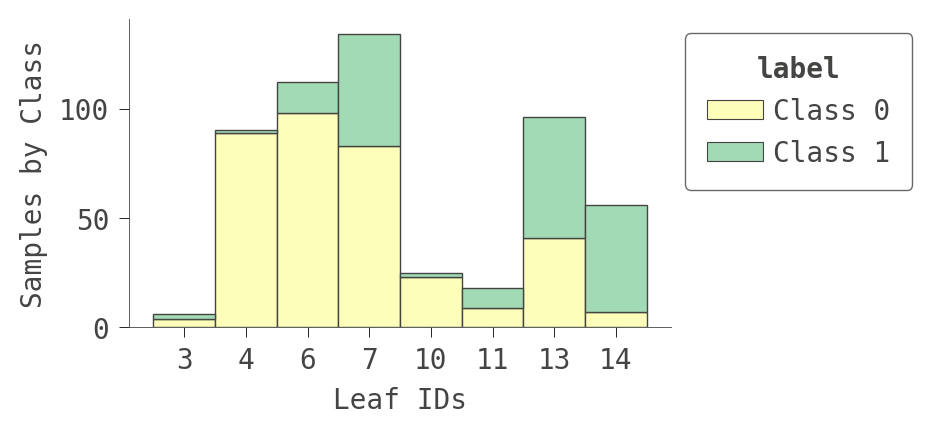

In [21]:
viz_model.ctree_leaf_distributions(figsize=(3.5, 2), fontname="monospace")
